# FINM 33150 - Regression Analysis and Quantitative Trading Strategies
## Homework 2 : Simple Spread Trading
## Suraj Kaul (skaul) - UCID 12214950
## 4/17/2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from scipy import stats

# Writting function for Data Retrival and Cleaning

In [2]:
@functools.lru_cache(maxsize=16)
def fetch_quandl(my_securities):
    qdata = quandl.get(list(my_securities), returns="pandas",authtoken='MgKeNNH7rTeBnh4t1667',start_date="2016-12-02", end_date="2018-12-31")
    return qdata

In [3]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

### UCID : 12214950
    Selected Pair
    RYU: Invesco S&P 500 Equal Weight Utilities ETF (less liquid)
    XLU: Utilities Select Sector SPDR ETF (more liquid)
    Spread is defined as RYU - XLU

# Doing prelimnary analysis on 1 Day Return Spread
    1. Plotting USD Prices of the Two securities - we see prices move together
    2. Plotting USD Volume traded of the Two securities - we see RYU is less liquid than XLU

In [7]:
raw_data = fetch_quandl(('EOD/RYU','EOD/XLU'))
df = clean_quandl_columns(raw_data)
df.to_excel("Quandl_Data.xlsx")
df['RYU:Return']=df['RYU:Adj_Close']/df['RYU:Adj_Close'].shift(1)-1
df['XLU:Return']=df['XLU:Adj_Close']/df['XLU:Adj_Close'].shift(1)-1

#Spread is Buy RYU, short-sell XLU
df['Spread']=df['RYU:Return']-df['XLU:Return']
df=df.loc["2017-01-01":"2018-12-31"]

In [6]:
df

,RYU:Open,RYU:High,RYU:Low,RYU:Close,RYU:Volume,RYU:Dividend,RYU:Split,RYU:Adj_Open,RYU:Adj_High,RYU:Adj_Low,...,XLU:Dividend,XLU:Split,XLU:Adj_Open,XLU:Adj_High,XLU:Adj_Low,XLU:Adj_Close,XLU:Adj_Volume,RYU:Return,XLU:Return,Spread
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,80.89,81.1160,80.4689,81.0800,15344.0,0.000,1.0,75.435894,75.646656,75.043188,...,0.000,1.0,44.698711,44.818522,44.366835,44.652630,18880685.0,0.003714,-0.002471,0.006184
2017-01-04,81.08,81.8206,81.0800,81.5100,24057.0,0.000,1.0,75.613083,76.303748,75.613083,...,0.000,1.0,44.717144,45.049020,44.634290,44.818522,14550500.0,0.005303,0.003715,0.001588
2017-01-05,81.75,81.7500,81.1279,81.6500,14503.0,0.000,1.0,76.237908,76.237908,75.657754,...,0.000,1.0,44.919901,44.938333,44.385359,44.864603,16306401.0,0.001718,0.001028,0.000689
2017-01-06,81.72,81.9500,81.2897,81.8600,7781.0,0.000,1.0,76.209931,76.424423,75.808644,...,0.000,1.0,44.643414,45.085793,44.560468,45.002847,10967168.0,0.002572,0.003081,-0.000509
2017-01-09,81.94,82.0000,80.7500,80.7500,13626.0,0.000,1.0,76.415097,76.471051,75.305334,...,0.000,1.0,45.168739,45.187171,44.403792,44.413008,13847156.0,-0.013560,-0.013107,-0.000453
2017-01-10,80.81,80.8100,80.2470,80.6000,8747.0,0.000,1.0,75.361288,75.361288,74.836249,...,0.000,1.0,44.403792,44.422224,44.099656,44.274765,11224177.0,-0.001858,-0.003113,0.001255
2017-01-11,80.48,81.2786,80.4800,81.2700,6173.0,0.000,1.0,75.053539,75.798293,75.053539,...,0.000,1.0,44.265548,44.781657,44.256332,44.735576,13397707.0,0.008313,0.010408,-0.002095
2017-01-12,81.35,81.3500,80.8700,81.2152,13848.0,0.000,1.0,75.864878,75.864878,75.417243,...,0.000,1.0,44.763225,44.846171,44.505170,44.772441,9410404.0,-0.000674,0.000824,-0.001498
2017-01-13,81.13,81.3100,80.8800,81.3000,8845.0,0.000,1.0,75.659712,75.827575,75.426569,...,0.000,1.0,44.680279,44.836954,44.422224,44.707927,12173299.0,0.001044,-0.001441,0.002485


C:\Users\Pallavi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


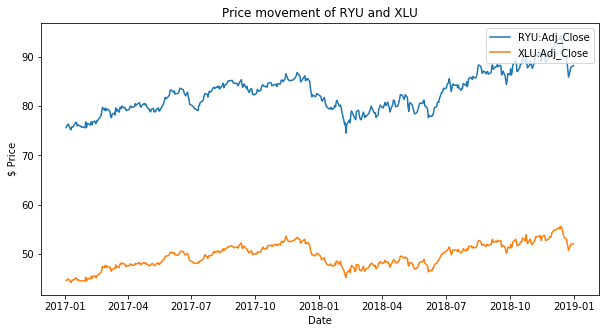

In [5]:
plt.subplots(figsize=(10,5))
plt.plot(df['RYU:Adj_Close'])
plt.plot(df['XLU:Adj_Close'])
plt.title("Price movement of RYU and XLU")
plt.ylabel("$ Price")
plt.xlabel("Date")
plt.legend(loc="upper right")
plt.show()

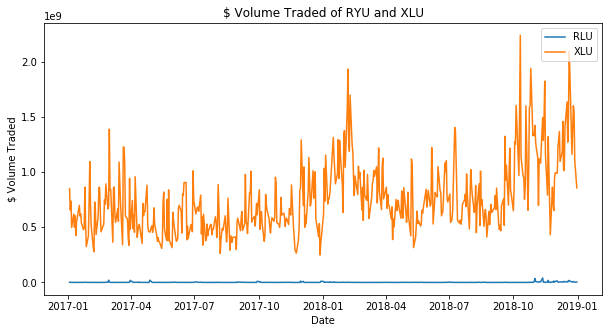

In [6]:
plt.subplots(figsize=(10,5))
plt.plot(np.multiply(df['RYU:Adj_Close'],df['RYU:Volume']),label="RLU")
plt.plot(np.multiply(df['XLU:Adj_Close'],df['XLU:Volume']),label="XLU")
plt.title("$ Volume Traded of RYU and XLU")
plt.ylabel("$ Volume Traded")
plt.xlabel("Date")
plt.legend(loc="upper right")
plt.show()

### Distribution of Returns Spread
    Plotting Spread Return vs Date, is a messy graph, instead we plot the desnity of 1 Day Return Spread.
    We also do a T-test to check if the mean is significantly different from zero.
    H0: Mean is zero
    Ha: Mean is different from zero
    
    Results: The p value is very high 0.946 thus unable to reject the Null Hypothesis that mean = 0.

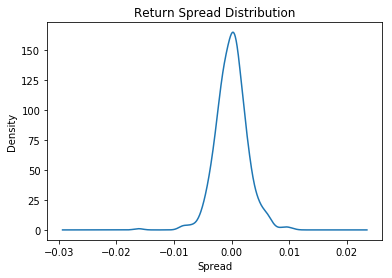

count    502.000000
mean       0.000008
std        0.002706
min       -0.016129
25%       -0.001573
50%        0.000024
75%        0.001468
max        0.010293
Name: Spread, dtype: float64


In [7]:
df['Spread'].plot.density()
plt.xlabel("Spread")
plt.title("Return Spread Distribution")
plt.show()
print(df['Spread'].describe())

In [8]:
one_sample = stats.ttest_1samp(df['Spread'],0.0)
print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 0.068 and the p-value is 0.946.


### Check if the returns are correlated
    As we see below the coefficient of correlation is high ~ 0.94 (hence we do expect the returns to move in tandem) so the pair is good fit for mean reversion. The coefficient is approximately the value of delta we select. For our case we take delta to be equal to 1 (which is close to what we get below)

C:\Users\Pallavi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pallavi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


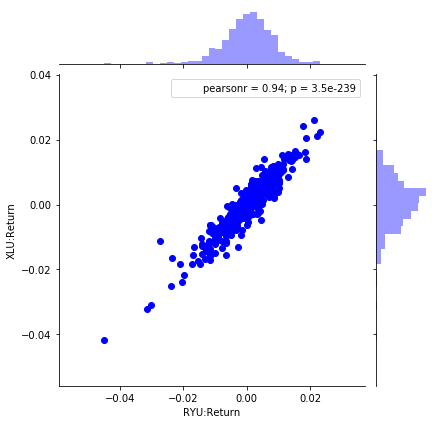

In [9]:
sns.jointplot(df['RYU:Return'], df['XLU:Return'] ,color='b')
plt.show()

### Cointegration Test
    While corelation is able to confirm if the prices move in tandem, the statistic that confirms if a series is Cointegration.
    It checks if we can create a stationary time series using the given two non-stationary series from a linear combination.
    H0: Unit root, No cointegration
    Ha: No Unit root, i.e. Stationary Series
    
    Results: p< 0.05 then reject H0 hypothesis, thus the two series can be used to create a stationary time-series 

In [10]:
r=ts.coint(df['RYU:Return'], df['XLU:Return'])
print('Cointegration test statistic =',r[0])
print('Cointegration test p-value =',r[1])
print('Cointegration test 1%, 5% and 10% test statistics =',r[2])

Cointegration test statistic = -7.078418984142999
Cointegration test p-value = 5.5767965116115575e-09
Cointegration test 1%, 5% and 10% test statistics = [-3.91843365 -3.34835299 -3.05292631]


### Augmented Dickey-Fuller test to check if 1 Day Return Spread is Stationary (constant mean and variance)
    H0: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Ha: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
    
    Results : We are able to reject the H0 as p<0.05 thus the spread is stationary (also mean reverting)

In [11]:
cadf = ts.adfuller(df['Spread'])
print('Augmented Dickey Fuller test statistic =',cadf[0])
print('Augmented Dickey Fuller p-value =',cadf[1])
print('Augmented Dickey Fuller 1%, 5% and 10% test statistics =',cadf[4])

Augmented Dickey Fuller test statistic = -6.512441983151081
Augmented Dickey Fuller p-value = 1.09190827301029e-08
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'1%': -3.4437386290417082, '5%': -2.867444458865948, '10%': -2.5699148492415413}


### Half Life of mean reversion
    Mean reversion tells us, how quickly does the spread revert back to the mean. The higher the value, slower is the series to revert back to its mean and similarly lower the value of half life, more quickly will the spread revert back to the mean.
    We would want a smaller half life as it would give us more opportunities to trade.
    
    Result: half life of 0.6 Days means the spread will revert back quickly to mean, thus the spread is good to use for trading.

In [12]:
spread_lag = df["Spread"].shift(1)
spread_lag.iloc[0] = spread_lag.iloc[1]
spread_ret = df["Spread"] - spread_lag
spread_ret.iloc[0] = spread_ret.iloc[1]
spread_lag2 = sm.add_constant(spread_lag)

model = sm.OLS(spread_ret,spread_lag2)
res = model.fit()
hl = round(-np.log(2) / res.params[1],1)
print('Halflife = ',hl)

Halflife =  0.6


C:\Users\Pallavi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Spread_Trade Function

## Parameters
### M : Number of Days for calculating the returns
### g: Entry Point for Buy/Short-Sell Positions
    g is defined as how many standard deviation away from the mean is the entry point
    ex: if g =1.5 then the entry point :for short-sell spread is (mean + 1.5 std), for buying the spread is (mean - 1.5 std)
        *we have assumed mean=0 based on test above
### j : Exit Point for Buy/Short-Sell Positions
    j is defined as a fraction of g (as j<g), it is the level at which we exit out of buy/short-sell position.
    ex: if j = 0.7 then the exit point :for short-sell spread is (mean + 0.7 * g), for buying the spread is (mean - 0.7 * g)
        *we have assumed mean=0 based on test above
### s: Stop Loss Level (as % of GTC)
    s represents % loss of intial GTC, where Gross Traded Cash (GTC) is |$long| + |$short|
    
### graph :
    Boolean type flag just to indicate if you want to have graphs as outputs, for our search of optimal parameters it should be kept to False/0. Only set it to 1 when trying to run for an individual case. This calls the graph_f function below, which plots the trading positions with the spread, and also provides some useful metrics around the trading.



### List of Columns in df
    0:'RYU:Volume' : It is the RYU Volume traded for that day, used for calculating N_t
    1: 'RYU:Adj_Close': Daily Adj closing price for RYU
    2: 'RYU:Adj_Volume' : It is the RYU Adj Volume traded for that day, same as RYU:Volume
    3: 'XLU:Volume': It is the XLU Volume traded for that day, used for calculating N_t
    4: 'XLU:Adj_Close':Daily Adj closing price for XLU
    5: 'XLU:Adj_Volume':It is the XLU Adj Volume traded for that day, same as XLU:Volume
    6: 'RYU:Return': M day returns for RYU
    7: 'XLU:Return': M day returns for XLU
    8: 'Spread': Difference between RYU:Return and XLU:Return
    9: 'ME' : Boolean flag, for highlighting month's last trading day
    10: 'N_t' : 15 day moving median value for USD volume traded 
    11: 'Position' : takes value +1 (buy) and -1 (sell)
    12: 'M2M' : Mark to market of current position (wrt price of position entered)
    13: 'XLU:Position' : Current Position of XLU ETF (-ve means short-sell, +ve means long)
    14: 'RYU:Position' : Current Position of RYU ETF (-ve means short-sell, +ve means long)
    15: 'StopLoss' : Indicator which shows if stop loss is kicked in for the month (it stays 1 for rest of month, resets on the 1st day for next month). No trading is allowed as long as this flag is 1.
    16: 'StopLoss_Level': USD amt, s% of GTC. If MtM < - stop loss level, stop loss is triggered
    17: 'Trade_Type': values belong to (+1,-1,0,+2,-2) +1/-1 represents Entering a Long/Short spread position from no position. +2/-2 represents entering a Long/Short spread position from Short/Long position.
    18: 'XLU:Traded': The traded quantity of XLU ETFs, is zero when position is unchanged (+ve long, -ve short)
    19: 'RYU:Traded': The traded quantity of XLU ETFs, is zero when position is unchanged (+ve long, -ve short)
    20:'Cash_Flow': Captures the cash flow of positions (signs adjusted to be opposite of positions, eg long position means short cash) 
    21: 'PnL_C' : Cummulative sum of the cash flows above, replicated cummulative Pnl made till date
    22: 'Entry': Boolean variable, takes value 1 whenever we are long the spread previously no position, 0 otherwise
    23: 'Exit': Boolean variable, takes value 1 whenever we are short the spread previously no position, 0 otherwise
    24 'Entry_after_Exit' : Boolean variable, takes value 1 whenever we buy the spread previously short the spread, 0 otherwise
    25: 'Exit_after_Entry' : Boolean variable, takes value 1 whenever we short-sell the spread previously we bought (long) the spread, 0 otherwise
    26: 'SL_Flag' : Boolean variable, 1 only the day stop loss is kicked 0 otherwise

In [13]:
def Spread_Trade(M,g,j,s,graph):
    
    raw_data = fetch_quandl(('EOD/RYU','EOD/XLU'))
    df = clean_quandl_columns(raw_data)
    df['RYU:Return']=df['RYU:Adj_Close']/df['RYU:Adj_Close'].shift(M)-1
    df['XLU:Return']=df['XLU:Adj_Close']/df['XLU:Adj_Close'].shift(M)-1
    df['Spread']=df['RYU:Return']-df['XLU:Return']
    
    
    
    df=df[['RYU:Volume','RYU:Adj_Close','RYU:Adj_Volume','XLU:Volume','XLU:Adj_Close',\
           'XLU:Adj_Volume','RYU:Return', 'XLU:Return','Spread']]
    temp=pd.DataFrame(df.index,index=df.index).shift(-1)
    df['ME']=(temp["Date"].dt.month!=df.index.month)
    del temp
    
    df['N_t']=np.minimum((df['RYU:Volume']*df['RYU:Adj_Close']).rolling(15).median(), \
                     (df['XLU:Volume']*df['XLU:Adj_Close']).rolling(15).median())
    
    K=2*df['N_t'].max()
    
    #Selecting only dates of Interest 01 Jan 2017 to 31st Dec 2018
    df=df.loc["2017-01-01":"2018-12-31"]
    
    u=0  #df['Spread'].mean(), assuming mean=0
    g=g*df['Spread'].std()
    j=j*g
    
    df["Position"]=0*len(df["Spread"])
    df['M2M']=0.0*len(df["Spread"])
    df['XLU:Position']=0*len(df["Spread"])
    df['RYU:Position']=0*len(df["Spread"])
    df["StopLoss"]=0*len(df["Spread"])
    df["StopLoss_Level"]=0.0*len(df["Spread"])
    

    flag,stop_loss,gross_cash_traded=0,0,0
    ryu_traded_price,xlu_traded_price=0,0
    xlu_qty,ryu_qty=0,0
    stop_loss_level=0
    
    for i in range(0,len(df['Spread'])):
        #updating M2M value
        df.iat[i,12]=xlu_qty*(df.iat[i,4]-xlu_traded_price)+ ryu_qty*(df.iat[i,1]-ryu_traded_price)

        if df.iat[i,12]<-stop_loss_level: #M2M < - (stop loss)
            stop_loss=1
            flag=0
            xlu_qty,ryu_qty,stop_loss_level=0,0,0
            gross_cash_traded=0
            

        if(df.iat[i,9]): #Checking for month end
            flag=0
            stop_loss=0
            gross_cash_traded=0
            xlu_qty,ryu_qty=0,0

            df.iat[i,11]=flag
            df.iat[i,13]=xlu_qty
            df.iat[i,14]=ryu_qty
            df.iat[i,15]=stop_loss
            df.iat[i,16]=stop_loss_level
            continue

        if(stop_loss!=0): #If we hit a stop-loss no more trading this month    
            df.iat[i,11]=flag#["Position"]
            df.iat[i,13]=xlu_qty#["XLU:Position"]
            df.iat[i,14]=ryu_qty #["RYU:Position"]
            df.iat[i,15]=stop_loss
            df.iat[i,16]=stop_loss_level
            continue    

        if(df.iat[i,8]>u+g and flag!=-1 and not stop_loss): #short spread means short-sell RYU buy XLU
            flag=-1
            xlu_qty= np.floor(0.01*df.iat[i,10]/df.iat[i,4])
            ryu_qty= -np.floor(0.01*df.iat[i,10]/df.iat[i,1])
            xlu_traded_price=df.iat[i,4]
            ryu_traded_price=df.iat[i,1]
            gross_cash_traded=abs(ryu_qty*ryu_traded_price)+abs(xlu_qty*xlu_traded_price)
            stop_loss_level=s*gross_cash_traded

        if(df.iat[i,8]<u+j and flag==-1): #exit point for short-sell spread
            flag=0
            gross_cash_traded=0
            xlu_qty,ryu_qty,stop_loss_level=0,0,0


        if(df.iat[i,8]<u-g and flag!=1 and not stop_loss): #long spread means  buy RYU short-sell XLU
            flag=1
            xlu_qty= -np.floor((1/100*df.iat[i,10])/df.iat[i,4])
            ryu_qty= np.floor((1/100*df.iat[i,10])/df.iat[i,1])
            xlu_traded_price=df.iat[i,4]
            ryu_traded_price=df.iat[i,1]
            gross_cash_traded=abs(ryu_qty*ryu_traded_price)+abs(xlu_qty*xlu_traded_price)
            stop_loss_level=s*gross_cash_traded

        if(df.iat[i,8]>u-j and flag==1): #exit point for buy-long spread
            flag=0
            gross_cash_traded=0
            xlu_qty,ryu_qty,stop_loss_level=0,0,0

        df.iat[i,11]=flag #updating the ["Position"] column
        df.iat[i,13]=xlu_qty #updating the ["XLU:Position"] column
        df.iat[i,14]=ryu_qty #updating the ["RYU:Position"] column
        df.iat[i,15]=stop_loss #updating if ['StopLoss'] column
        df.iat[i,16]=stop_loss_level #updating if ['StopLoss_Level'] column
        
    df['Trade_Type']=df.iloc[:,11]-df.iloc[:,11].shift(1).fillna(0)
    df['XLU:Traded']=df.iloc[:,13]-df.iloc[:,13].shift(1).fillna(0)
    df['RYU:Traded']=df.iloc[:,14]-df.iloc[:,14].shift(1).fillna(0)
    df["Cash_Flow"]=(-df.iloc[:,19]*df.iloc[:,1]-df.iloc[:,18]*df.iloc[:,4])
    df['PnL_C']=df.iloc[:,20].cumsum()
    df["Entry"]=df.iloc[:,17].where(df.iloc[:,17]==1)
    df["Exit"]=-1*df.iloc[:,17].where(df.iloc[:,17]==-1)
    df["Entry_after_Exit"]=1/2*df.iloc[:,17].where(df.iloc[:,17]==2)
    df["Exit_after_Entry"]=-1/2*df.iloc[:,17].where(df.iloc[:,17]==-2)
    df['SL_Flag']=(df.iloc[:,15]-df.iloc[:,15].shift(1).fillna(0))
    df['SL_Flag']=df['SL_Flag'].where(df['SL_Flag']==1)
    
    if graph==1:
        graph_f(df,u,g,j)
        return
        
    return (df.iat[-1,21])   

In [14]:
def graph_f(df,u,g,j):
        print("Short-sell spread Entry point u+g is %0.4f"%(u+g))
        print("Short-sell spread Exit point u+j is %0.4f"%(u+j))
        print("Long spread Entry point u-g is %0.4f"%(u-g))
        print("Long spread Exit point u-j is %0.4f"%(u-j))
        print("Stop Loss Hit ",df['SL_Flag'].sum(),' times')
        print("Total Positions entered ",0.5*(df.iloc[:,22].sum()+abs(df.iloc[:,23].sum())
                                         +2*df.iloc[:,24].sum()+2*abs(df.iloc[:,25].sum()))," times")
        
        print("Total times traded ",(df.iloc[:,22].sum()+abs(df.iloc[:,23].sum())
                                         +2*df.iloc[:,24].sum()+2*abs(df.iloc[:,25].sum()))," times")
        print("Pnl is ",df.iat[-1,21])
        print("Return on Capital K=",round(2*df['N_t'].max(),1),", is {0:f}%".format(df.iat[-1,21]/(2*df['N_t'].max())))
        print("\n")
        print("Monthly Pnl summary :")
        print(df['Cash_Flow'].groupby([df.index.year,df.index.month]).sum())
        
        plt.subplots(figsize=(50,16))
        plt.plot(df.index,df['Spread'])
        plt.plot(df.index,df['Entry_after_Exit']*df['Spread'],'ro',color="green",markersize=20,label="Buying Spread after Selling")
        plt.plot(df.index,df['Exit_after_Entry']*df['Spread'],'ro',color="red",markersize=20,label="Selling Spread after Buying")
        plt.plot(df.index,df['Entry']*df['Spread'],'ro',color="green",markersize=10,label="Buying Spread")
        plt.plot(df.index,df['Exit']*df['Spread'],'ro',color="red",markersize=10,label="Selling Spread")
        plt.plot(df.index,df['SL_Flag']*df['Spread'],'*',color="black",markersize=10,label="Stop Loss")
        plt.vlines(df.index[df.iloc[:,9]==1],0.015,-0.015,linestyles='dotted')
        x_min,x_max=df.index[0],df.index[-1]
        plt.legend(loc='upper left')
        plt.hlines(u+g,x_min,x_max)
        plt.hlines(u+j,x_min,x_max)
        plt.hlines(u-g,x_min,x_max)
        plt.hlines(u-j,x_min,x_max)
        plt.xlabel("Dates")
        plt.ylabel("Spread")
        
        plt.title("Spread Trading (RYU - XLU) Pnl = $%0.4f"%df.iat[-1,21],fontsize=30)
        plt.show()
    

# Running the Strategy for random parameters


Short-sell spread Entry point u+g is 0.0023
Short-sell spread Exit point u+j is 0.0012
Long spread Entry point u-g is -0.0023
Long spread Exit point u-j is -0.0012
Stop Loss Hit  4.0  times
Total Positions entered  117.0  times
Total times traded  234.0  times
Pnl is  1746.1631496711884
Return on Capital K= 10745169.0 , is 0.000163%


Monthly Pnl summary :
Date  Date
2017  1        44.864405
      2        -1.089623
      3        68.415015
      4         5.297917
      5       -49.462968
      6        24.280177
      7       -35.804866
      8       -16.686718
      9        -0.228797
      10       61.127196
      11        7.771786
      12        1.740168
2018  1       -34.877788
      2       610.962652
      3       -11.673070
      4        61.813729
      5        82.466482
      6        40.534069
      7        66.696280
      8        17.875320
      9        -3.665269
      10      149.384443
      11      387.109093
      12      269.313516
Name: Cash_Flow, dtype: float6

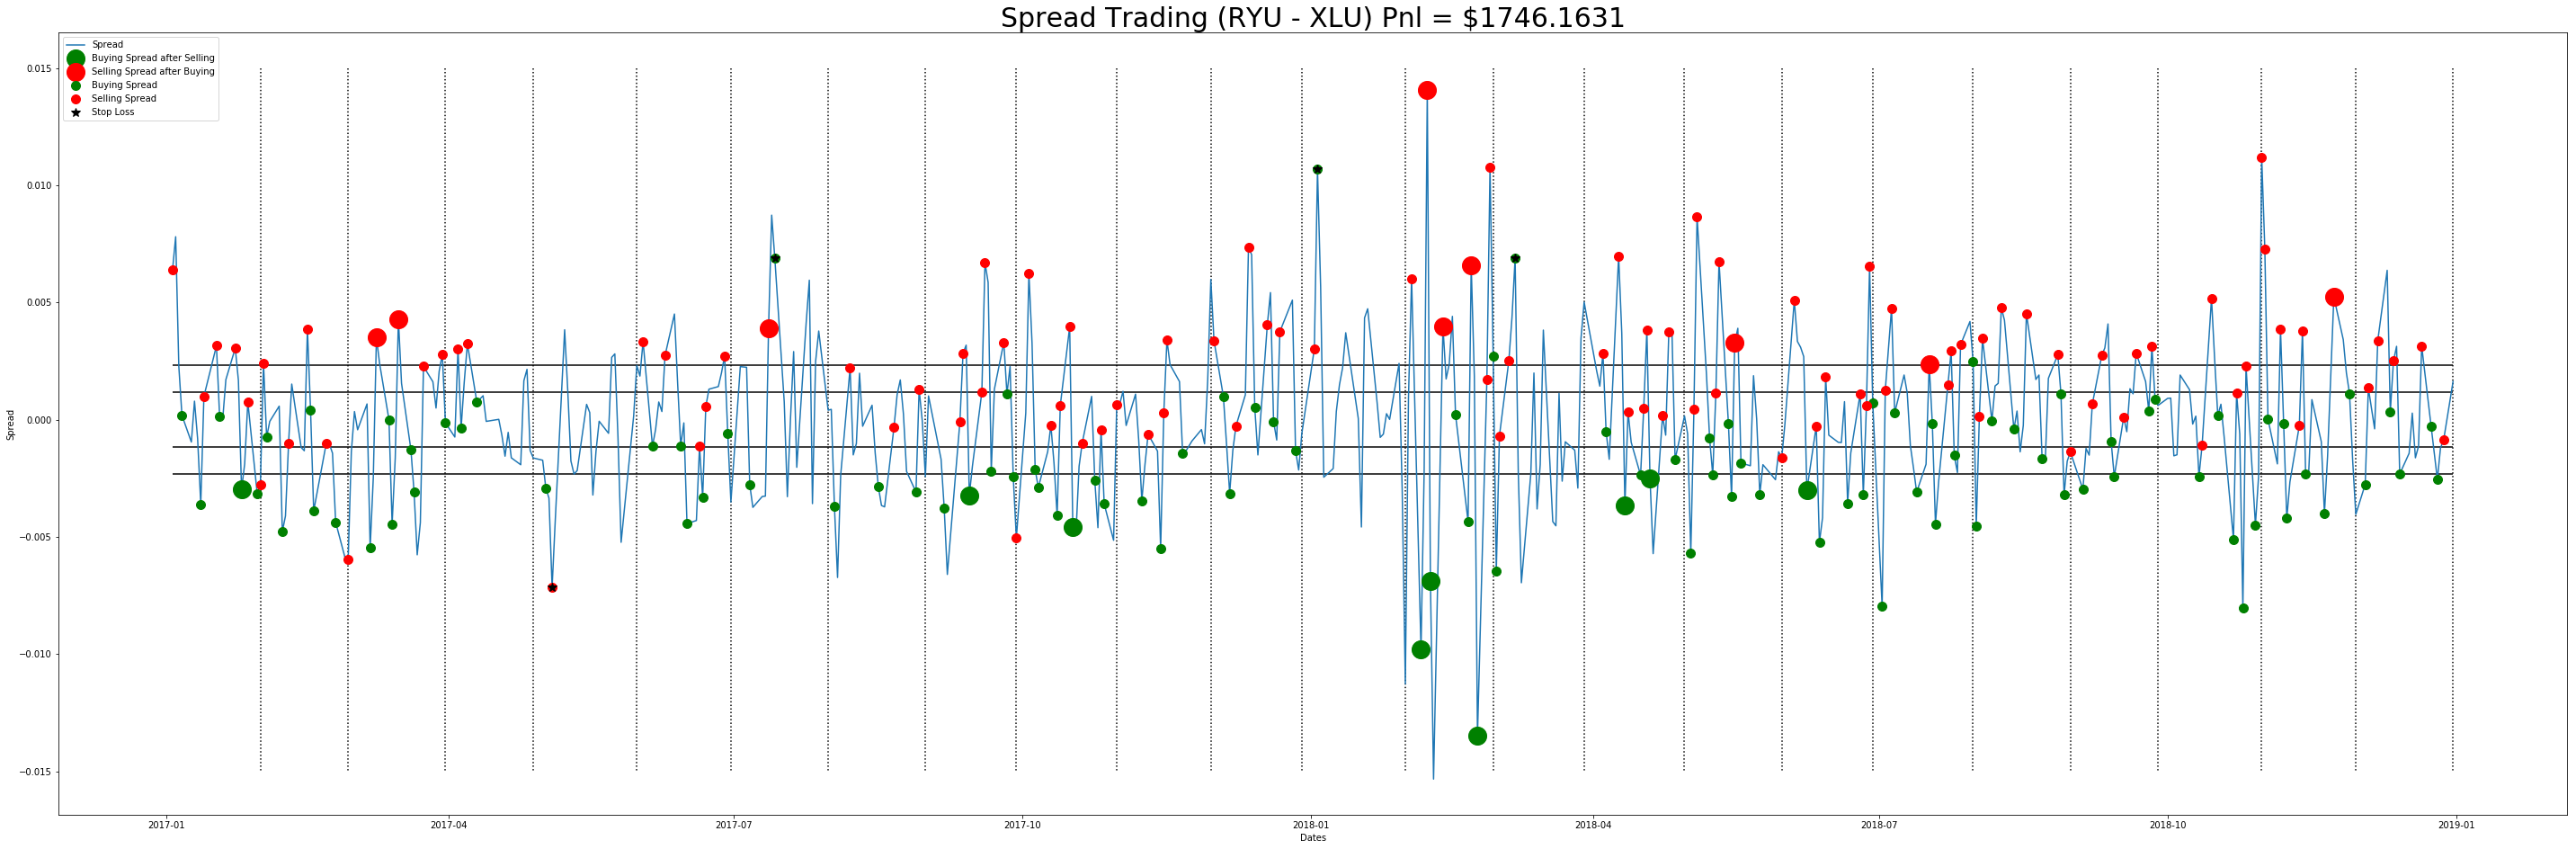

In [15]:
Spread_Trade(2,0.7,0.5,0.003,graph=1)

### Explanation of the Graph 
    1. The four horizontal lines represent the various entry and exit points for trading. 
    2. The short-sell points are marked with red circles, and buy  points are marked with green circles. 
    3. Small circles represent buy/short-sell from no position before, and bigger circles represents buy/short-sell position from short-sell/buy (significant movement to cause change in position)
    4. The black star shows the points where stop-loss is breached (it may not necessarily be in the expected direction of spread)
    4. The dashed vertical lines represents the month end dates, where we unwind/exit any exsisting position.

# Trying out different values to find Optimum Parameters
    Current range as follows:
    M : 1,2,3,4,5,10,15,20
    g : 0.5 to 1.5 (multiplied by std)
    j : 0.1 to 0.7 (multiplied by g)
    s : 0.2% to 0.6% of GTC

In [16]:
temp=[]
for i in [1,2,3,4,5,10,15,20]: #M
    for j in np.arange(0.5,1.6,0.1): #g
        for k in np.arange(0.1,0.7,0.1): #j
            for l in np.arange(0.002,0.007,0.001): #s
                temp.append([i,j,k,l,Spread_Trade(i,j,k,l,0)])

results=pd.DataFrame(temp,columns=["M","g","j","s","Pnl"])                
results['j']=np.round(results['j'],3)
results['g']=np.round(results['g'],3)
results['s']=np.round(results['s'],4)

In [17]:
print("Top 20 PNL generating combinations are:")
print(results.sort_values("Pnl",ascending=False).head(20))

Top 20 PNL generating combinations are:
     M    g    j      s          Pnl
372  2  0.6  0.3  0.004  2245.116805
373  2  0.6  0.3  0.005  2245.116805
374  2  0.6  0.3  0.006  2245.116805
369  2  0.6  0.2  0.006  2232.783247
368  2  0.6  0.2  0.005  2232.783247
367  2  0.6  0.2  0.004  2232.783247
349  2  0.5  0.4  0.006  2220.719501
348  2  0.5  0.4  0.005  2220.719501
377  2  0.6  0.4  0.004  2213.210450
378  2  0.6  0.4  0.005  2213.210450
379  2  0.6  0.4  0.006  2213.210450
343  2  0.5  0.3  0.005  2200.593151
344  2  0.5  0.3  0.006  2200.593151
383  2  0.6  0.5  0.005  2191.729727
384  2  0.6  0.5  0.006  2191.729727
382  2  0.6  0.5  0.004  2191.729727
402  2  0.7  0.3  0.004  2189.093923
403  2  0.7  0.3  0.005  2189.093923
404  2  0.7  0.3  0.006  2189.093923
339  2  0.5  0.2  0.006  2183.675007


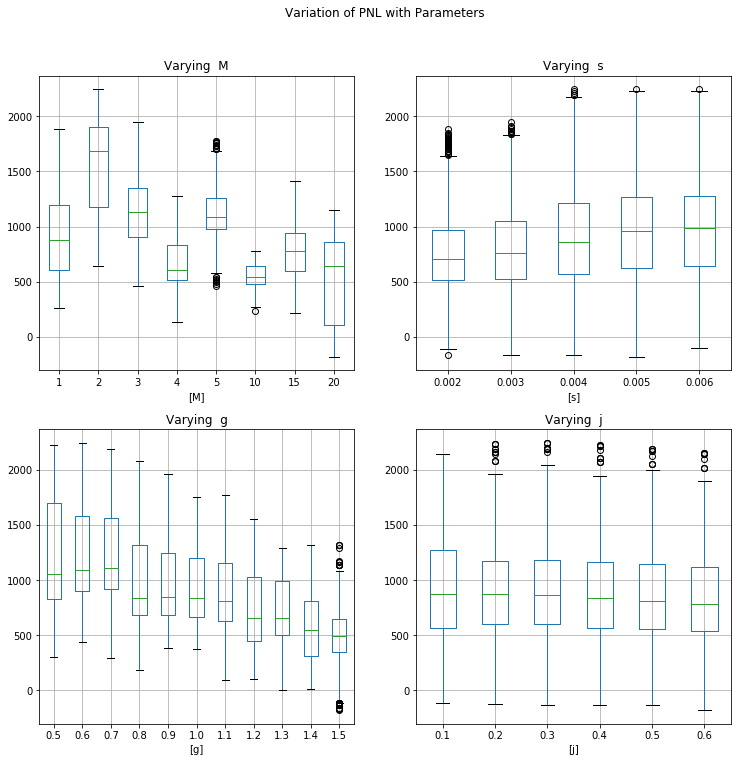

In [18]:
f, ax = plt.subplots(2, 2,figsize=(12,12))
results.boxplot(column=['Pnl'],by=['M'],ax=ax[0][0])
ax[0][0].title.set_text("Varying  M")
results.boxplot(column=['Pnl'],by=['s'],ax=ax[0][1])
ax[0][1].title.set_text("Varying  s")
results.boxplot(column=['Pnl'],by=['g'],ax=ax[1][0])
ax[1][0].title.set_text("Varying  g")
results.boxplot(column=['Pnl'],by=['j'],ax=ax[1][1])
ax[1][1].title.set_text("Varying  j")
f.suptitle("Variation of PNL with Parameters")
plt.show()

## Finding from the above Box Plots
### M
    1. We see although we make money for most M's, but the distribution of PnL around M=1,2,3 has a better profile (higher median, q1, q3)
    2. Going forward I will restrict my analysis to M = 1,2,3
### s 
    1. For s belonging to 0.4% to 0.6% the distribution looks very similar (we know stop loss doesn't kick for s > 0.5%)
    2. For my further analysis I'll reduce the range of s from 0.1% to 0.5%
### g:
    1. A downward sloping trend as g increases.
    2. Better Pnl profile for lower g's, as would be expected as we are more likely to trade compared to higher g's where we would trade a less. I will reduce my lower bound for g, to see if PnL distribution improves even more.
    3. Going forward I will restrict g to 0.3 and 1 (*std)
### j:
    1. While we see a slight downward trend in the distribution of Pnl, currently it includes values of M, s and g which we found above to not be optimum. Thus we will wait to comment on j till the next iteration.
    


## Changing the ranges based on findings above
    Current range as follows:
    M : 1,2,3
    g : 0.3 to 1 (multiplied by std)
    j : 0.1 to 0.9 (multiplied by g)
    s : 0.1% to 0.5% of GTC

In [19]:
temp=[]
for i in [1,2,3]: #M
    for j in np.arange(0.3,1.1,0.1): #g
        for k in np.arange(0.1,1,0.1): #j
            for l in np.arange(0.001,0.008,0.001): #s
                temp.append([i,j,k,l,Spread_Trade(i,j,k,l,0)])

results1=pd.DataFrame(temp,columns=["M","g","j","s","Pnl"])                
results1['j']=np.round(results1['j'],3)
results1['g']=np.round(results1['g'],3)
results1['s']=np.round(results1['s'],4)

In [20]:
print("Top 20 PNL generating combinations are:")
print(results1.sort_values("Pnl",ascending=False).head(20))

Top 20 PNL generating combinations are:
     M    g    j      s          Pnl
550  2  0.3  0.7  0.005  2477.146805
551  2  0.3  0.7  0.006  2477.146805
552  2  0.3  0.7  0.007  2477.146805
543  2  0.3  0.6  0.005  2458.560154
544  2  0.3  0.6  0.006  2458.560154
545  2  0.3  0.6  0.007  2458.560154
537  2  0.3  0.5  0.006  2449.041378
536  2  0.3  0.5  0.005  2449.041378
538  2  0.3  0.5  0.007  2449.041378
599  2  0.4  0.5  0.005  2441.690259
600  2  0.4  0.5  0.006  2441.690259
601  2  0.4  0.5  0.007  2441.690259
549  2  0.3  0.7  0.004  2432.859837
529  2  0.3  0.4  0.005  2429.759420
530  2  0.3  0.4  0.006  2429.759420
531  2  0.3  0.4  0.007  2429.759420
558  2  0.3  0.8  0.006  2420.717915
559  2  0.3  0.8  0.007  2420.717915
557  2  0.3  0.8  0.005  2420.717915
592  2  0.4  0.4  0.005  2417.880684


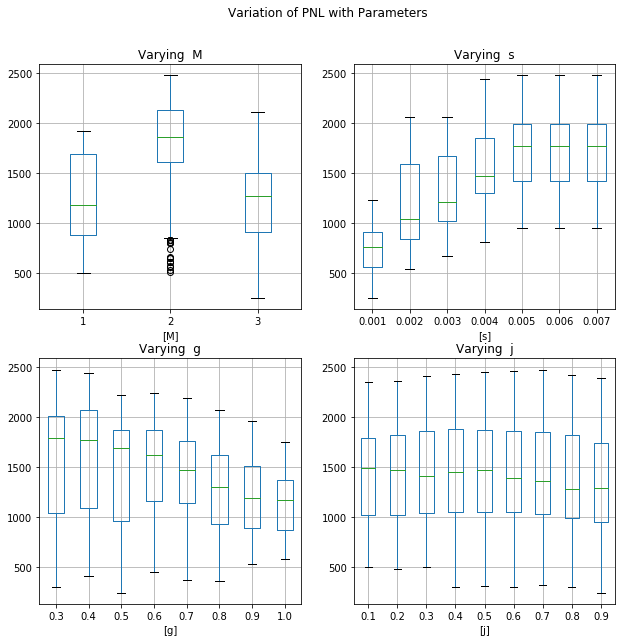

In [21]:
f, ax = plt.subplots(2, 2,figsize=(10,10))
results1.boxplot(column=['Pnl'],by=['M'],ax=ax[0][0])
ax[0][0].title.set_text("Varying  M")
results1.boxplot(column=['Pnl'],by=['s'],ax=ax[0][1])
ax[0][1].title.set_text("Varying  s")
results1.boxplot(column=['Pnl'],by=['g'],ax=ax[1][0])
ax[1][0].title.set_text("Varying  g")
results1.boxplot(column=['Pnl'],by=['j'],ax=ax[1][1])
ax[1][1].title.set_text("Varying  j")
f.suptitle("Variation of PNL with Parameters")
plt.show()

## Finding from the above Box Plots
### M
    1. We can clearly infer that M=2 is the optimal choice (higher median , q1 and q3 than other two days)
### s 
    1. An uppward trend in Pnl is evident as we keep increasing the s, which is explainable by the fact higher the value of s less likely to hit the stop loss level (and accumulate a loss)
    2. While s= 0.1% is restrictive, s can be selected to lie between 0.2% to 0.4% depending on risk-aversion

    While there are certain trends visible in g and j, we can comment about them with more certainity if we just restrict ourselves to M=2 

### BoxPlot with M = 2  

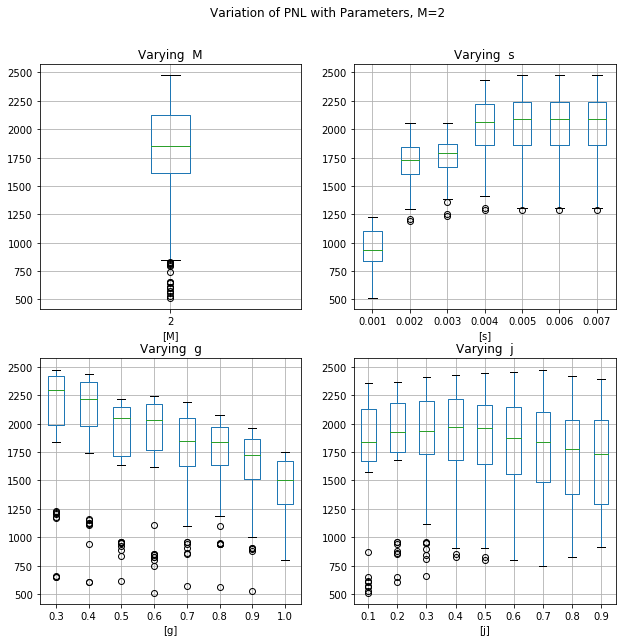

In [22]:
results2=results1[results1['M']==2]

f, ax = plt.subplots(2, 2,figsize=(10,10))
results2.boxplot(column=['Pnl'],by=['M'],ax=ax[0][0])
ax[0][0].title.set_text("Varying  M")
results2.boxplot(column=['Pnl'],by=['s'],ax=ax[0][1])
ax[0][1].title.set_text("Varying  s")
results2.boxplot(column=['Pnl'],by=['g'],ax=ax[1][0])
ax[1][0].title.set_text("Varying  g")
results2.boxplot(column=['Pnl'],by=['j'],ax=ax[1][1])
ax[1][1].title.set_text("Varying  j")
f.suptitle("Variation of PNL with Parameters, M=2")
plt.show()


## Finding from the above Box Plots
### s 
    1. Similar to what we saw earlier lower values of s (0.1%) is restrictive to trading, where as for s > 0.4% the distribution of Pnl stays constant (SL doesn't kick in).
    2. Ideal range anywher in between 0.2% to 0.4%.
 
### g:
    1. Similar to before a downward sloping trend as g increases.
    2. As stated earlier a lower value of g increases the number of times we trade, while it may be tempting to select a    lower value of g we must realise that it would also lead to higher trading cost. So finding the optimal g level depends on comparing the cost vs increase in Pnl.
    3. A good range for the value of g would be 0.4 to 0.7 (* std) with more granularity.
### j:
    1. for j < 0.3 we do see a higher median, q1, q3 compared to the rest, but we also see a more outliers than the rest. 
    2. For j > 0.7 we see relatively worse Pnl distribution, also such a high j would mean higher amount of trading leading to higher trading cost, effectively reducing the Pnl. 
    3. So I will maintain the range from 0.2 to 0.8, as I increase the granularity of g I'll get more information about j.
    

## Final set of ranges to find the optimal paramter bounds :
    Current range as follows:
    M : 2
    g : 0.25 to 0.7 (multiplied by std)
    j : 0.2 to 0.8 (multiplied by g)
    s : 0.05% to 0.6% of GTC

In [23]:
temp=[]
for i in [2]: #M
    for j in np.arange(0.2,0.701,0.05): #g
        for k in np.array([0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8]): #j
            for l in np.array([0.0005,0.001,0.0015,0.002,0.003,0.004,0.005,0.006]): #stop loss
                temp.append([i,j,k,l,Spread_Trade(i,j,k,l,0)])

results3=pd.DataFrame(temp,columns=["M","g","j","s","Pnl"])                
results3['j']=np.round(results3['j'],3)
results3['g']=np.round(results3['g'],3)
results3['s']=np.round(results3['s'],5)

In [24]:
print("Top 20 PNL generating combinations are:")
print(results3.sort_values("Pnl",ascending=False).head(20))

Top 20 PNL generating combinations are:
     M    g     j      s          Pnl
231  2  0.3  0.70  0.006  2477.146805
230  2  0.3  0.70  0.005  2477.146805
223  2  0.3  0.65  0.006  2470.497888
222  2  0.3  0.65  0.005  2470.497888
214  2  0.3  0.60  0.005  2458.560154
215  2  0.3  0.60  0.006  2458.560154
207  2  0.3  0.55  0.006  2458.560154
206  2  0.3  0.55  0.005  2458.560154
198  2  0.3  0.50  0.005  2449.041378
199  2  0.3  0.50  0.006  2449.041378
191  2  0.3  0.45  0.006  2448.572549
190  2  0.3  0.45  0.005  2448.572549
358  2  0.4  0.50  0.005  2441.690259
359  2  0.4  0.50  0.006  2441.690259
229  2  0.3  0.70  0.004  2432.859837
182  2  0.3  0.40  0.005  2429.759420
183  2  0.3  0.40  0.006  2429.759420
351  2  0.4  0.45  0.006  2429.752525
350  2  0.4  0.45  0.005  2429.752525
221  2  0.3  0.65  0.004  2426.210919


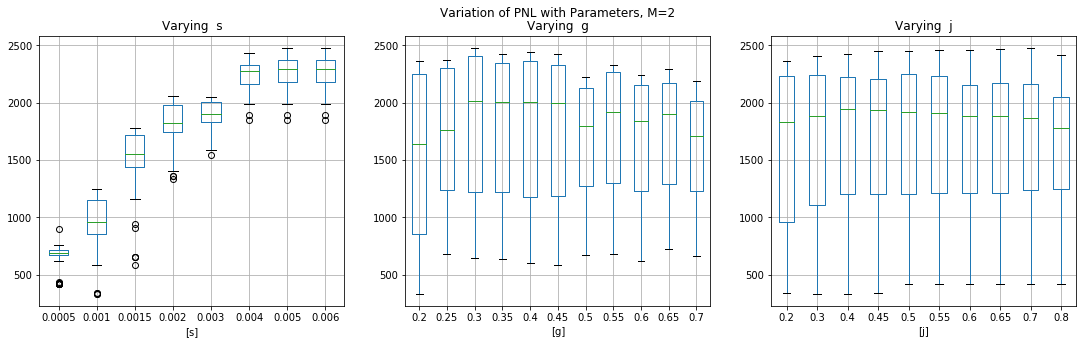

In [25]:
f, ax = plt.subplots(1, 3,figsize=(18,5))
results3.boxplot(column=['Pnl'],by=['s'],ax=ax[0])
ax[0].title.set_text("Varying  s")
results3.boxplot(column=['Pnl'],by=['g'],ax=ax[1])
ax[1].title.set_text("Varying  g")
results3.boxplot(column=['Pnl'],by=['j'],ax=ax[2])

ax[2].title.set_text("Varying  j")
f.suptitle("Variation of PNL with Parameters, M=2")
plt.show()


# Summary

### M:
    We found M=2 to be the optimum value, and found that as we increase M the overall profitablity/Pnl of the stratergy reduces.
    
### g:
    Although very low (<0.3) g values did show good distribution of the Pnl, these positions would require a greater amount of trading and thus reducing the overall Pnl. High values of g (>1) have a worse Pnl distribution as it would reduce the overall number of trading points. The good range for g looks to be around 0.35 to 0.7. 
    
### j:
    Althought values of j close to 1, give a better distribution of the Pnl, but again this would lead to significant amount of trading and thus higher trading cost reducing the overall Pnl. The distribution for Pnl for j < 0.3, looks worse off than the rest. Thus the ideal range for j is anywhere from 0.4 to 0.8
    
### s:
    In our entire analysis we saw stop-loss doesn't kick in for values higher than 0.06% (of GTC), and also levels < 0.01% (of GTC) restrict trading causing worse off Pnl distributions. So the range for s is anywhere in between 0.02% to 0.06% depending on risk-aversion for investors. 
    
    

# References :

    https://www.pythonforfinance.net/2016/05/09/python-backtesting-mean-reversion-part-2/
 
     https://machinelearningmastery.com/time-series-data-stationary-python/
    